In [1]:
# Import jupy4syn libraries
from lib.StartMotorsButton import StartMotorsButton
from lib.ManualAlignmentButton import ManualAlignmentButton
from lib.PVMonitor import PVMonitor
from lib.ScalerButton import ScalerButton
from lib.MonitorScanSave import MonitorScanSave
from lib.EnergyScanButton import EnergyScanButton
from lib.ExportButtonLatex import ExportButtonLatex
from lib.ExportButtonHTML import ExportButtonHTML
from lib.Configuration import Configuration

# Enable offline plots from Plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)

### Configuration

In [2]:
config = Configuration()
config.display()

Checkbox(value=False, description="Print log in Notebook's cells", style=DescriptionStyle(description_width='i…

Output()

### First manual alignment

In [3]:
# Jupyter textbox interface
start_motor_button_box = StartMotorsButton(config)
start_motor_button_box.display()

Output()

In [4]:
#!caput SOL:m1.RBV 10

In [5]:
# Slit PyQt Interface
slit = ManualAlignmentButton(config)
slit.display()

In [6]:
#!pydm --hide-nav-bar --hide-menu-bar /usr/local/SOL/GUI/sol-widgets/examples/motor/slits.ui

In [7]:
# Scaler interface
scaler = ScalerButton(config)
scaler.display()

Text(value='', layout=Layout(width='300px'), placeholder='Type the macro')

Output()

In [8]:
#!pydm --hide-nav-bar --hide-menu-bar /usr/local/SOL/GUI/Scaler_GUI/scaler.py

### PV's monitoring

In [9]:
pv_monitor = PVMonitor(config)
pv_monitor.display()

Output()

In [10]:
#!camonitor SOL:m1.RBV

### Scan
Com "Live Plot", acima de 600 pontos começa a prejudicar performance do caderno

Com os 2 "Plot after ends [...]", não há problemas de performance por parte do caderno durante o scan

Dropdown(options=('Plot after ends with PyQt', 'Plot after ends with Plotly', 'Live Plot'), style=DescriptionS…

Box(layout=Layout(height='40px', width='40px'))

Box()

Output()

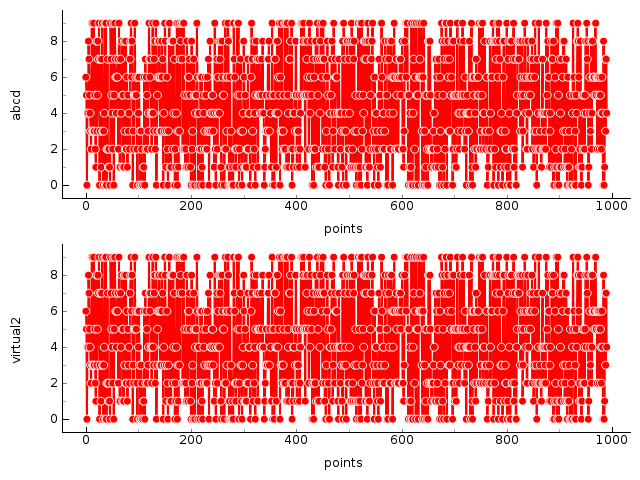

2019-05-24 13:48:42 UTC-0| [SCAN]:
Scan with command: 'scan -c default -o /home/gabriel.andrade/work/jupy4syn/scans/plot --snake --motor solm1 --start 1.0 --end 100.0 --step-or-points 0.1 --time 0.1' repeated 1 times
Scan configuration: 'default'
Scan data saved in: '/home/gabriel.andrade/work/jupy4syn/scans/plot_0121'
Jupyter Scan plot saved in: '/home/gabriel.andrade/work/jupy4syn/scans/plot_0121-jupy.png'
PyQtGraph Scan plot saved in: '/home/gabriel.andrade/work/jupy4syn/scans/plot_0121.png'


In [11]:
# Scan-gui
scan_plot = MonitorScanSave(config)
scan_plot.display()

In [12]:
#!pydm --hide-nav-bar --hide-menu-bar /usr/local/SOL/GUI/scan-gui/scan_gui.py

### Energy scan

In [13]:
energy_scan = EnergyScanButton(config)
energy_scan.display()

Box()

Output()

### Export (shows config again)

In [14]:
config.display()

Checkbox(value=False, description="Print log in Notebook's cells", style=DescriptionStyle(description_width='i…

Output()

In [15]:
export_latex = ExportButtonLatex(config)
export_latex.display()

In [16]:
#!python3 -m nbconvert work-notebook.ipynb --template=nbextensions --output-dir=./exports --output=work_notebook.tex --to tex

In [17]:
export_html = ExportButtonHTML(config)
export_html.display()

In [18]:
#!python3 -m nbconvert work-notebook.ipynb --template=nbextensions --output-dir=./exports --output=work_notebook.html --to html

In [19]:
import pandas as pd

def update_pd(default_names, label):
    dfs = []
    number_non_empty = len(default_names)

    for default_name in default_names:
        try:
            dfs.append(pd.read_csv(default_name, sep=' ', comment='#', header=None))
        except:
            dfs.append(pd.DataFrame())
            number_non_empty -= 1

    if number_non_empty == 0:
        return dfs, label

    filtered_label = label
    if not label:
        labels = []
        with open(default_names[0]) as file:
            for i, line in enumerate(file):
                if i == 6:
                    number_reads = (int(line.split(' ')[1]))
                elif i == 8:
                    labels = line.split(' ')[1:]
                    break

        labels = list(filter(lambda x: x != '', labels))

        for item in labels:
            filtered_label.append(item.rstrip('\n'))

        label = filtered_label

    for df in dfs:
        if not df.empty:
            df.columns = pd.Index(filtered_label, dtype='object')
        
    return dfs, label

In [20]:
import time
import os

def get_scan_name(fileName, number_repeats):
    # Waits for file to be written by scan writter
    time.sleep(1.0)

    scan_names = []

    leadingZeros = 4
    newName = ""
    cont = 0
    while(True):
        cont += 1
        newName = fileName + "_" + str(cont).zfill(leadingZeros)
        print(newName)
        if(os.path.isfile(newName)):
            print("cont")
            continue
        else:
            for i in range(number_repeats):
                scan_names.append(fileName + "_" + str(cont - 1 + i).zfill(leadingZeros))
            break

    return scan_names

In [21]:
import time

file_name = "/home/gabriel.andrade/work/jupy4syn/scans/k"

scan_names = get_scan_name(file_name, 1)

dfs = []
dfs.append(pd.DataFrame())
while dfs[0].empty:
    label = []
    dfs, label = update_pd(scan_names, label)

/home/gabriel.andrade/work/jupy4syn/scans/k_0001
cont
/home/gabriel.andrade/work/jupy4syn/scans/k_0002
cont
/home/gabriel.andrade/work/jupy4syn/scans/k_0003
cont
/home/gabriel.andrade/work/jupy4syn/scans/k_0004
cont
/home/gabriel.andrade/work/jupy4syn/scans/k_0005
cont
/home/gabriel.andrade/work/jupy4syn/scans/k_0006
cont
/home/gabriel.andrade/work/jupy4syn/scans/k_0007
cont
/home/gabriel.andrade/work/jupy4syn/scans/k_0008
cont
/home/gabriel.andrade/work/jupy4syn/scans/k_0009
cont
/home/gabriel.andrade/work/jupy4syn/scans/k_0010
cont
/home/gabriel.andrade/work/jupy4syn/scans/k_0011
cont
/home/gabriel.andrade/work/jupy4syn/scans/k_0012
cont
/home/gabriel.andrade/work/jupy4syn/scans/k_0013
cont
/home/gabriel.andrade/work/jupy4syn/scans/k_0014


In [22]:
dfs[0].diff().dropna()

,solm1,abcd,virtual2
1,0.1,7.0,7.0
2,0.1,0.0,0.0
3,0.1,-9.0,-9.0
4,0.1,3.0,3.0
5,0.1,6.0,6.0
6,0.1,-4.0,-4.0
7,0.1,-4.0,-4.0
8,0.1,3.0,3.0
9,0.1,1.0,1.0
10,0.1,-5.0,-5.0
